# Problem 12.2

**Fundamentals of Solar Cells and Photovoltaic Systems Engineering**

**Solutions Manual - Chapter 12**

**Problem 12.2**


**Assume that, in addition to the dark I-V curve provided in the previous problem, we have also measured the I-V curve under illumination. The latter has been measured under standard test conditions (STC), that is 1000 W/m$^2$ and AM1.5G spectrum, and is provided in this book online repository. You are asked to verify the superposition principle between the dark I-V curve and the illumination I-V curve, described in Chapter 4. To that end, add a photogenerated current $I_L$ to the dark I-V curve and compare it with the experimental I-V curve under illumination Estimate the $I_L$ value that results in the best fitting of both curves. Take into account that the dark or recombination current and the photogenerated current have opposite signs.**

We will use the package [pandas](https://pandas.pydata.org/) to handle the data and [matplotlib.pyplot](https://matplotlib.org/stable/index.html) to plot the results.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

We start by importing the data from the dark and illumination I-V curves.

In [2]:
dark_IV = pd.read_csv('data/Dark_I_V_curve.csv',  header=0) 
dark_IV.head()

,V (V),I (A)
0,0.1598,0.000003
1,0.2239,0.000004
2,0.2657,0.000006
3,0.3099,0.000008
4,0.3568,0.000011


In [3]:
illum_IV = pd.read_csv('data/Illumination_I_V_curve.csv',  header=0) 
illum_IV.head()

,V (V),I (A)
0,-0.3000,0.226923
1,-0.2555,0.226572
2,-0.2110,0.226254
3,-0.1665,0.225777
4,-0.1219,0.225872


We can plot both curves.

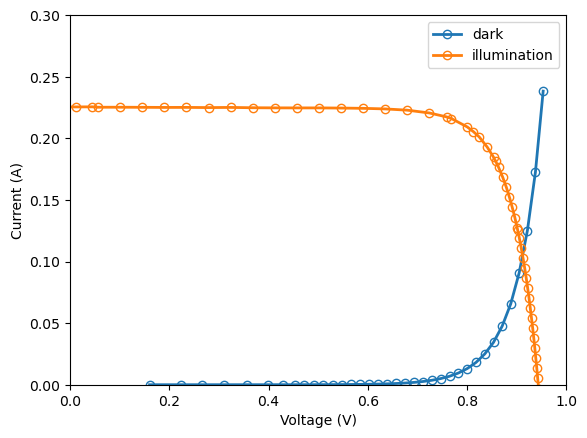

In [4]:
plt.plot(dark_IV['V (V)'], dark_IV['I (A)'],
         linewidth=2, marker='o', markerfacecolor="None",
         label='dark')
plt.plot(illum_IV['V (V)'], illum_IV['I (A)'],
         linewidth=2, marker='o',markerfacecolor="None",
         label='illumination')
plt.ylabel('Current (A)')
plt.xlabel('Voltage (V)')
plt.xlim([0,1])
plt.ylim([0,0.3])
plt.legend()

We can try different values of photogenerated current $I_L$, apply the superposition principle, and plot the measured IV curve under illumination and the estimated IV curve. Visually, we can select the $I_L$ that maximizes the fitting between both curves.

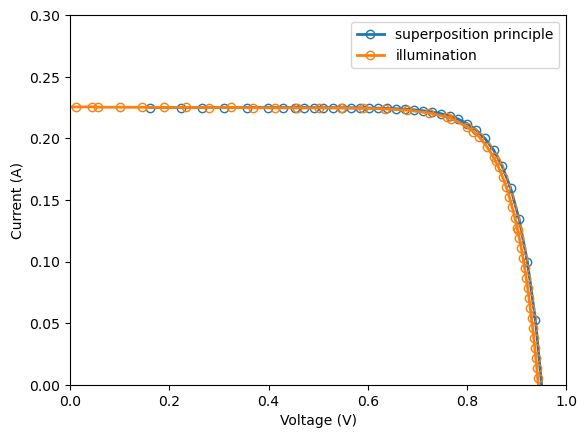

In [5]:
I_L=0.225
superposed_IV = dark_IV.copy()
superposed_IV['I (A)'] = I_L - dark_IV['I (A)']

plt.plot(superposed_IV['V (V)'], superposed_IV['I (A)'],
         linewidth=2, marker='o', markerfacecolor="None",
         label='superposition principle')
plt.plot(illum_IV['V (V)'], illum_IV['I (A)'],
         linewidth=2, marker='o', markerfacecolor="None",
         label='illumination')
plt.ylabel('Current (A)')
plt.xlabel('Voltage (V)')
plt.xlim([0,1])
plt.ylim([0,0.3])
plt.legend()